In [10]:
import os
import glob
import numpy as np

from tqdm import tqdm

import xarray as xr

from pysputnipic import utils


In [14]:
path = "/homelocal/louisr/simulations/sputniPIC-mr2026/run00/data/"

In [15]:


path, _ = os.path.split(path)

# Get times
times = [
    int(os.path.split(f)[1].strip(".vtk").split("_")[1])
    for f in glob.glob("{}/B_*".format(path))
]
times = np.sort(times)
print(times)

# Number of time steps to read and plot
nt = len(times)

# Name species
species = ["ion", "electron", "net"]

# Get box size
# Read meta
meta = utils.read_input(os.path.join(path, "sputniPICparameters.txt"))

# Time step
dt = meta["dt"]

# Boz size
lx, ly, lz = meta["box_size"]
nx, ny, nz = meta["box_grid"]

x, y, z = [
    np.linspace(0, l, n) for l, n in zip(meta["box_size"], meta["box_grid"])
]

# Initialize arrays
e_xyz = np.zeros((nt, ny, nx, nz, 3))

for it, t in enumerate(tqdm(times)):
    # Read electromagnetic fields
    e_xyz[it, ...] = utils.read_field("E", t, path)

# Convert to xarray

e_xyz = xr.DataArray(
    e_xyz,
    coords=[times * dt, y, x, z, ["x", "y", "z"]],
    dims=["time", "y", "x", "z", "comp"],
)

[  10   20   30   40   50   60   70   80   90  100  110  120  130  140
  150  160  170  180  190  200  210  220  230  240  250  260  270  280
  290  300  310  320  330  340  350  360  370  380  390  400  410  420
  430  440  450  460  470  480  490  500  510  520  530  540  550  560
  570  580  590  600  610  620  630  640  650  660  670  680  690  700
  710  720  730  740  750  760  770  780  790  800  810  820  830  840
  850  860  870  880  890  900  910  920  930  940  950  960  970  980
  990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090 1100 1110 1120
 1130 1140 1150 1160 1170 1180 1190 1200 1210 1220 1230 1240 1250 1260
 1270 1280 1290 1300 1310 1320 1330 1340 1350 1360 1370 1380 1390 1400
 1410 1420 1430 1440 1450 1460 1470 1480 1490 1500 1510 1520 1530 1540
 1550 1560 1570 1580 1590 1600 1610 1620 1630 1640 1650 1660 1670 1680
 1690 1700 1710 1720 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820
 1830 1840 1850 1860 1870 1880 1890 1900 1910 1920 1930 1940 1950 1960
 1970 

100%|██████████| 400/400 [00:11<00:00, 33.43it/s]


In [ ]:

ncx, ncy

In [ ]:
def calc_rcrate(e_xyz, ixrc, sigma=10):
    r"""Calculate the reconnection rate from the electric field at the center of the box.

    Parameters
    ----------
    e_xyz : xarray.DataArray
        The electric field data array.
    ixrc : int
        The index of the location of the reconnection site along x.
    sigma : int, optional
        The number of grid points to average over along y, by default 10.

    Returns
    -------
    e_rec : xarray.DataArray
        The reconnection rate as a function of time.
    
    """
    
    # number of grid points along y
    ny = e_xyz.shape[1]
    
    # index of the center of the box along y (current sheet)
    iyrc = int(ny / 2)

    # Get the electric field at the center of the box
    e_rec = np.mean(-e_xyz.data[:, iyrc-sigma:iyrc+sigma, ixrc, 0, 2], axis=1)

    e_rec = xr.DataArray(e_rec, coords=[e_xyz.time], dims=["time"])
    return e_rec

# Calculate the reconnection rate
e_rec = calc_rcrate(e_xyz, ixrc=ncx//2, sigma=10)

In [34]:
import matplotlib.pyplot as plt


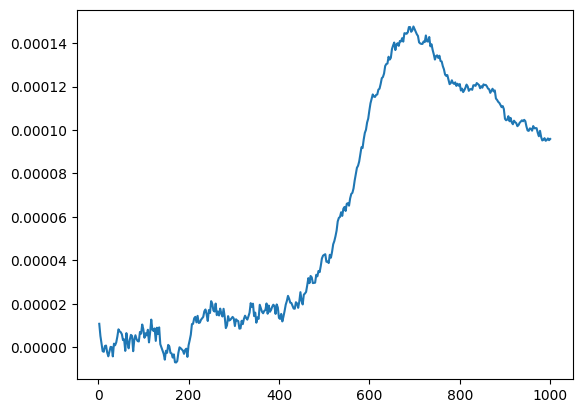

In [ ]:
f, ax = plt.subplots(1)
sigma = 10
ax.plot(e_xyz.time.data, )
